In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# importing dataset
train = pd.read_csv("train.csv")
train = train.set_index('ID')

In [3]:
test = pd.read_csv("test.csv")
test = test.set_index('ID')

In [4]:
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
ID,,,,,,,,,
VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [6]:
# check for datatypes
train.dtypes

Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [7]:
# check for missing values
train.isna().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [8]:
test.isna().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [9]:
# filling missing values
train = train.fillna(train['Credit_Product'].value_counts().index[0])
test= test.fillna(test['Credit_Product'].value_counts().index[0])

In [10]:
# check for missing values after modifying
train.isna().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [11]:
test.isna().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

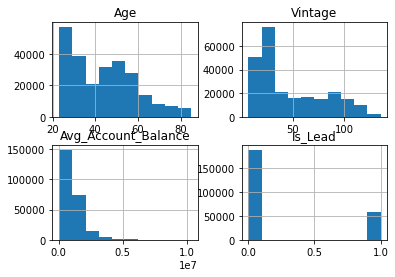

In [12]:
# visualization
train.hist();

In [13]:
# encoding categorical values for training set
lb_make = LabelEncoder()

for i in train.columns:
    if train[i].dtype == 'object':
        train[i] = lb_make.fit_transform(train[i])

train.head() 

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,0,73,18,1,2,43,0,1045696,0,0
IDD62UNG,0,30,27,2,0,32,0,581988,0,0
HD3DSEMC,0,56,18,3,2,26,0,1484315,1,0
BF3NC7KV,1,34,20,2,0,19,0,470454,0,0
TEASRWXV,0,30,32,2,0,33,0,886787,0,0


In [14]:
# encoding categorical values for testing set
lb_make = LabelEncoder()

for i in test.columns:
    if test[i].dtype == 'object':
        test[i] = lb_make.fit_transform(test[i])

test.head() 

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
ID,,,,,,,,,
VBENBARO,1,29,4,1,0,25,1,742366,0
CCMEWNKY,1,43,18,1,1,49,0,925537,0
VK3KGA9M,1,31,20,2,0,14,0,215949,0
TT8RPZVC,1,29,22,1,0,33,0,868070,0
SHQZEYTZ,0,29,20,1,0,19,0,657087,0


In [15]:
# splitting data into training and testing
X = train.drop('Is_Lead', axis=1)
y = train['Is_Lead']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
# feature scaling
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# test = sc.transform(test)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
models = [LogisticRegression(solver="liblinear"), KNeighborsClassifier(),  GaussianNB(), DecisionTreeClassifier(),
          RandomForestClassifier(), XGBClassifier()]
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)
    print(type(model).__name__)
    print("    AUC_SCORE", roc_auc_score(y_test, predictions[:,1]))

LogisticRegression
    AUC_SCORE 0.44780952115266065
KNeighborsClassifier
    AUC_SCORE 0.5795322447258374
GaussianNB
    AUC_SCORE 0.6939549096673672
DecisionTreeClassifier
    AUC_SCORE 0.6143757064802422
RandomForestClassifier
    AUC_SCORE 0.7619997351646157


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:58:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
    AUC_SCORE 0.7913077692048426


In [19]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[21:58:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
y_pred = model.predict_proba(X_test)

In [21]:
result = xgb.predict_proba(test)

In [22]:
result

array([[0.9645695 , 0.03543048],
       [0.7628487 , 0.23715134],
       [0.8925831 , 0.10741693],
       ...,
       [0.46020997, 0.53979003],
       [0.4481153 , 0.5518847 ],
       [0.8879224 , 0.11207759]], dtype=float32)

In [23]:
df=pd.read_csv("test.csv")
ID = df["ID"]
res = pd.DataFrame(ID)
res.columns = ["ID"]
#res["Is_Lead"] = result[0]
# res.to_csv("submission.csv",index=False)

In [24]:
abc= pd.DataFrame(result)
abc

,0,1
0,0.964570,0.035430
1,0.762849,0.237151
2,0.892583,0.107417
3,0.965652,0.034348
4,0.969828,0.030172
...,...,...
105307,0.027438,0.972562
105308,0.403315,0.596685
105309,0.460210,0.539790
105310,0.448115,0.551885


In [26]:
res["Is_Lead"] = abc[1]

,ID,Is_Lead
0,VBENBARO,0.035430
1,CCMEWNKY,0.237151
2,VK3KGA9M,0.107417
3,TT8RPZVC,0.034348
4,SHQZEYTZ,0.030172


In [28]:
res.head()
res.to_csv("submission.csv",index=False)

In [29]:
len(result)

105312

In [30]:
len(res["ID"])

105312